
# Project
# Analysis Of Moja Global Datasets To Evaluate Crossriver Forest In Nigeria

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Boundaries">Administrative Boundaries</a></li>
<li><a href="#Soil">Soil resources</a></li>
<li><a href="#Bioclimatic">Bioclimatic & Ecological Zone </a></li>
    1. Biodiversity Hotspot <br>
    2. Agroecological Zones <br>
<li><a href="#Landcover">Land Cover</a></li>
<li><a href="#Climate">Climate</a></li>
<li><a href="#Conclusion">Conclusion</a></li>

</ul>

<a id='Introduction'></a>
## Introduction

**```About:```** <br>
>Cross-River State is located in Nigeria's South South geopolitical zone. It’s capital is Calabar, and it shares borders with Benue State to the north, Ebonyi State and Abia State to the west, Akwa Ibom State to the southwest, and Cameroon to the east. Cross-River State was formerly known as the South-Eastern State before being renamed in 1976. <br><br>
Cross-River is the 19th largest in area and the 27th most populous state in Nigeria, with a population of over 3.8 million (as of 2016) and a land mass of approximately 21,265 km2. Currently, the state contains approximately 31% of Nigeria's total remaining tropical high forests.<br><br>
Cross-River State currently has roughly 40% of Nigeria's remaining threatened Tropical Rainforests. These forests are one of the oldest rainforests in Africa, and the country's Largest remaining stand of comparably unlogged Tropical Rainforest. Cross-River state is also well-known for its ecotourism potential. The ecotourism industry is largely dependent on the Tropical Rainforest, which are home to species endemic to Cross-River State. <br><br>
Geographically, the state is divided into two parts: 
>* The Guinean forest-savanna mosaic (in the far north)
>* The Cross-Sanaga-Bioko coastal forests (that cover the majority of the state's interior). 
 
The smaller ecoregions are the Central African mangroves in the far south of the country's coast and a part of the montane Cameroonian Highlands forests in the far northeast. The Cross River, which bisects Cross-River State's interior before forming much of the state's western border and flowing into the Cross-River Estuary, is the state's most prominent geographical feature. The Calabar and Great Kwa rivers, which flow from the inland Oban Hills before flanking Calabar and flowing into the Cross-River Estuary, are also significant.
 In the forested interior of the state are several biodiverse protected areas including the 
Cross-River National Park, 
Afi Mountain Wildlife Sanctuary, and 
Mbe Mountains Community Forest. 

>The Cross-river forest possesses vast features of a typical tropical rainforest ecosystem. The area harbours some African threatened species that are of paramount conservation relevance. Some of these tree species included Terminalia ivorensis, Pterocarpus soyauxii, Melicia excelsa, Bailonella toxisperma and Afzelia bipindensis . Besides the tree species, the forest equally contains animals of conservation significance. Amongst these are the  wildlife populations of Preuss's red colobus, African forest buffalo, bat hawk, tree pangolin, grey-necked rockfowl, and West African slender-snouted crocodile along with some of Nigeria's last remaining Nigeria-Cameroon chimpanzee, drill, African forest elephant, and the Cross River gorilla (Gorilla gorilla diehli) also endemic to the area.
The Forest resources of the state cover’s six ecological zones namely:- 
> 1.  Mangrove forests with an area of  480Km2 <br>
>2.  Swamp forest with an area of  520Km2 <br>
>3.  Tropical High Forests including the National Park with an area of  7,290 Km2 <br>
>4.  Plantations with an area of  460Km2 <br>
>5.  Other forests with an area of  216Km2 <br>
>6.  Other land uses have an area of 12,299 Km2 <br>            

Cross River State has lost approximately 19% of its tropical high forests over the last decades due to insufficient Forestry Department funding, population and immigration growth, and plantation establishment. <br>

Cross River State is rapidly developing its ecotourism potential and is widely regarded as Nigeria's premier tourist destination. The ability to balance, utilize, and preserve species, particularly those endemic to Cross River state, offers a solid foundation for environmental sustainability as well as significant money-making potential in the not-too-distant future.

**```Concerns:```** <br>
>Both divisions of the park are threatened by illegal logging, slash and burn farming and poaching. Eco-tourism may support efforts to preserve the park fauna. Assisting villagers in buffer zones to practice sustainable forestry also holds promise.

**```SOURCE:```**  <br>
>1. https://en.wikipedia.org/wiki/Cross_River_National_Park <br>
2. https://www.bradtguides.com/destinations/africa/nigeria/cross-river-forests-mountains/ <br>
3. Forest Resources of Cross River State: Their Potentials, Threats and Mitigation Measures - www.iosrjournals.org <br>
4. Abang, S.O and Omolaubi, D.A. (1994); Marketing Margins in Non-Timber forest products trade in Cross River State of Nigeria. <br> 
5. Akachukwu, AC (2007). Disappearing forest, the consequence and challenges of sustainable Development in Nigeria in Proceedings of 31st Annual Conference of the forestry Association of Nigeria – 25th November, 2006,

#### Importing Dataset

In [1]:
# install geopandas, this could take long
import geopandas as gpd

In [2]:
# for download and decompress the dataset
import os, zipfile, glob, io, requests

# for SIG and spatial info management
from shapely.geometry import Polygon, shape

# for SIG and spatial visualization
import folium
from folium import Choropleth
from folium.plugins import HeatMap

# for dataframes and numerical info management
import numpy as np
import pandas as pd

# for plot and graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.simplefilter("ignore", category=FutureWarning)

# for dependencies
%matplotlib inline

<a id='Boundaries'></a>
## Administrative boundaries

#### Importing Neccessary Data

In [3]:
# importing the data
world_df = gpd.read_file("ne_110m_admin_0_countries.zip")
world_df.to_crs(epsg=4326, inplace=True)

In [4]:
# also the dataset is huge (162 features), so it need cleaning.
world_df = world_df[['CONTINENT','NAME_LONG', 'POP_EST', 'POP_YEAR', 'geometry']]
world_df.columns = world_df.columns.str.lower()

In [5]:
world_df.head()

continent       name_long      pop_est  pop_year  \
0        Oceania            Fiji     889953.0      2019   
1         Africa        Tanzania   58005463.0      2019   
2         Africa  Western Sahara     603253.0      2017   
3  North America          Canada   37589262.0      2019   
4  North America   United States  328239523.0      2019   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [6]:
# features for plot
world_df['centroid'] = world_df.geometry.centroid # adding centroid for plotting names in the map

C:\Users\HP\AppData\Local\Temp\ipykernel_17432\1643154666.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_df['centroid'] = world_df.geometry.centroid # adding centroid for plotting names in the map


#### Plotting world map

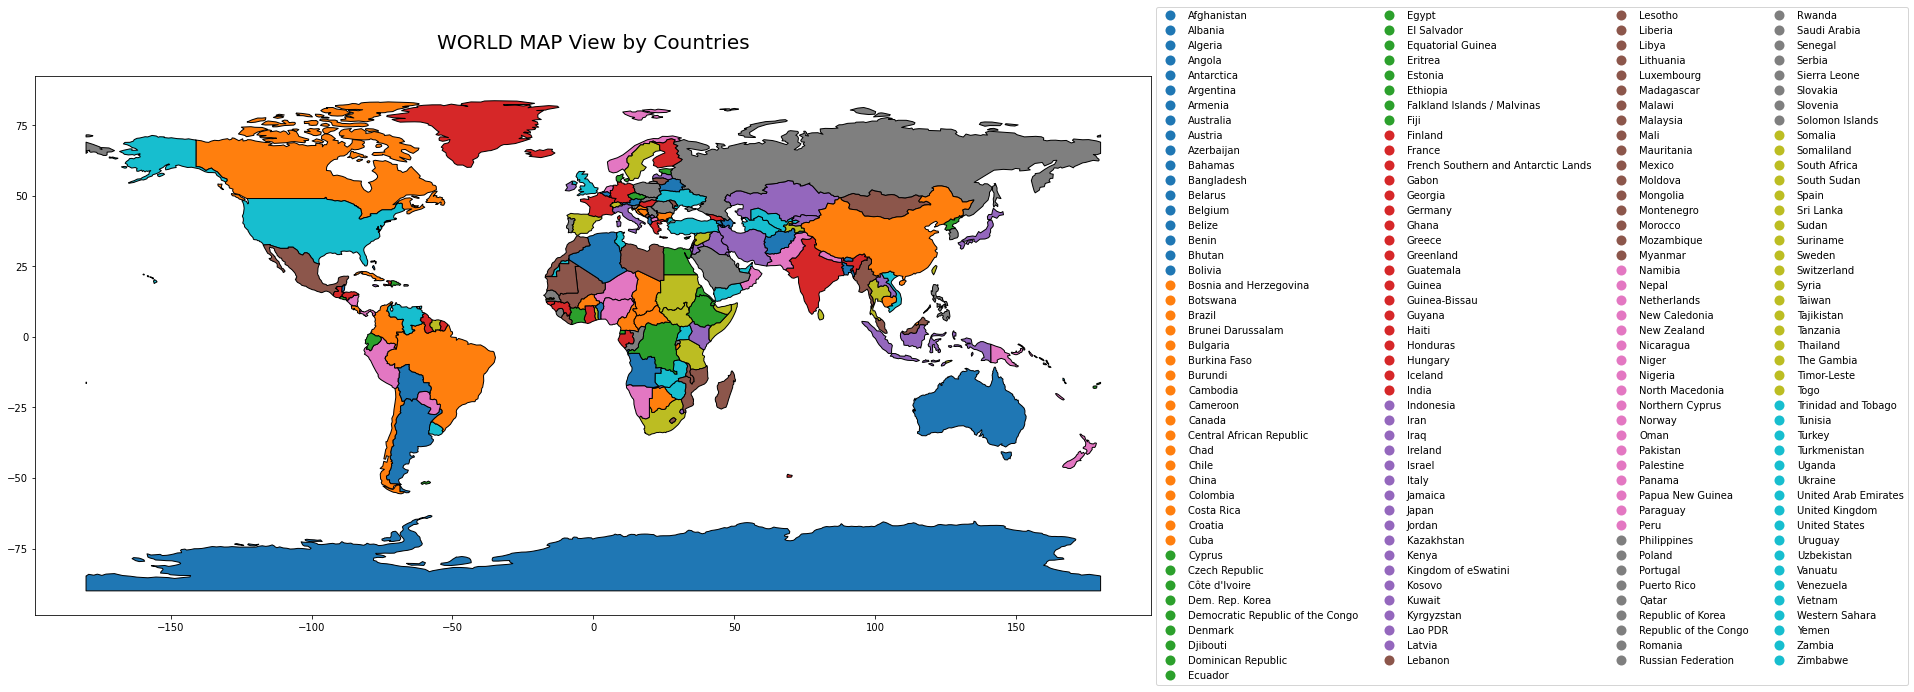

In [7]:
# Plotting the map
ax = world_df.plot(figsize=(20,15), column= 'name_long', cmap= 'tab10', 
                   edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'center left', 'ncol': 4, 'bbox_to_anchor':(1,0.5)})
ax.set_title('\nWORLD MAP View by Countries\n', fontsize=20)
plt.show()

#### Extracting African countries from the world data

In [8]:
# for the purpose of use this boundaries as a clipper, the african countries 
# (filtered on the CONTINENT feature) using pandas like dataframe management
africa_df = world_df.loc[world_df.continent == 'Africa',]

# fixing data
africa_df = africa_df.reset_index(drop=True)
# africa_df.lastcensus = africa_df.lastcensus.astype(str).replace({'-99':'1999'}).astype(int)

# features for plot
africa_df['popu'] = africa_df['pop_est'] / 1e6 # get the population in millions

In [9]:
# we show what the africa data looks like
africa_df.head()

continent                         name_long     pop_est  pop_year  \
0    Africa                          Tanzania  58005463.0      2019   
1    Africa                    Western Sahara    603253.0      2017   
2    Africa  Democratic Republic of the Congo  86790567.0      2019   
3    Africa                           Somalia  10192317.3      2019   
4    Africa                             Kenya  52573973.0      2019   

                                            geometry  \
0  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...   
1  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...   
2  POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...   
3  POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...   
4  POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...   

                     centroid       popu  
0   POINT (34.75299 -6.25773)  58.005463  
1  POINT (-12.13783 24.29117)   0.603253  
2   POINT (23.58296 -2.85028)  86.790567  
3    POINT (45.72670 4.75235)  10.192317  
4    POINT (37.79156 0.59597)  52.573973

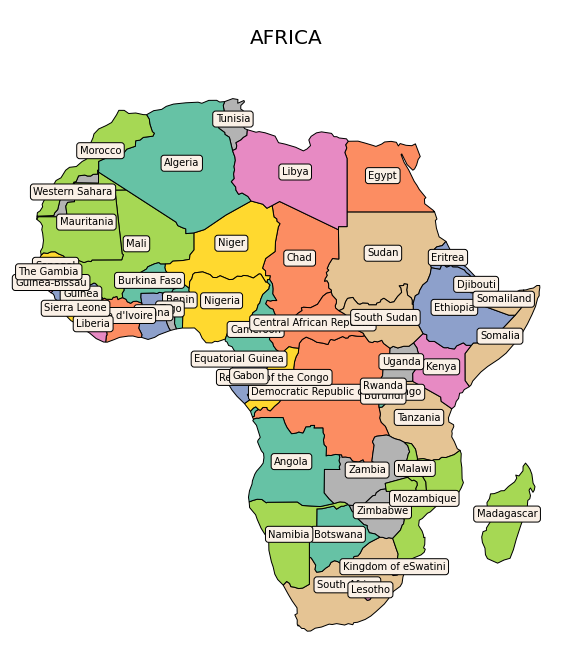

In [10]:
# Plotting the map
ax = africa_df.plot(figsize=(10,15), column= 'name_long', cmap= 'Set2', 
                           edgecolor= 'black')
ax.set_title('\nAFRICA\n', fontsize=20)

# names in the map
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in africa_df.iterrows():
  ax.text(point[1]['centroid'].x,
          point[1]['centroid'].y,
          point[1]['name_long'],
          horizontalalignment='center',
          fontsize=10,
          bbox=props)
ax.axis('off')
plt.show()

#### Plotting side by side maps showing contrast between african countries and their respective population (in millions)

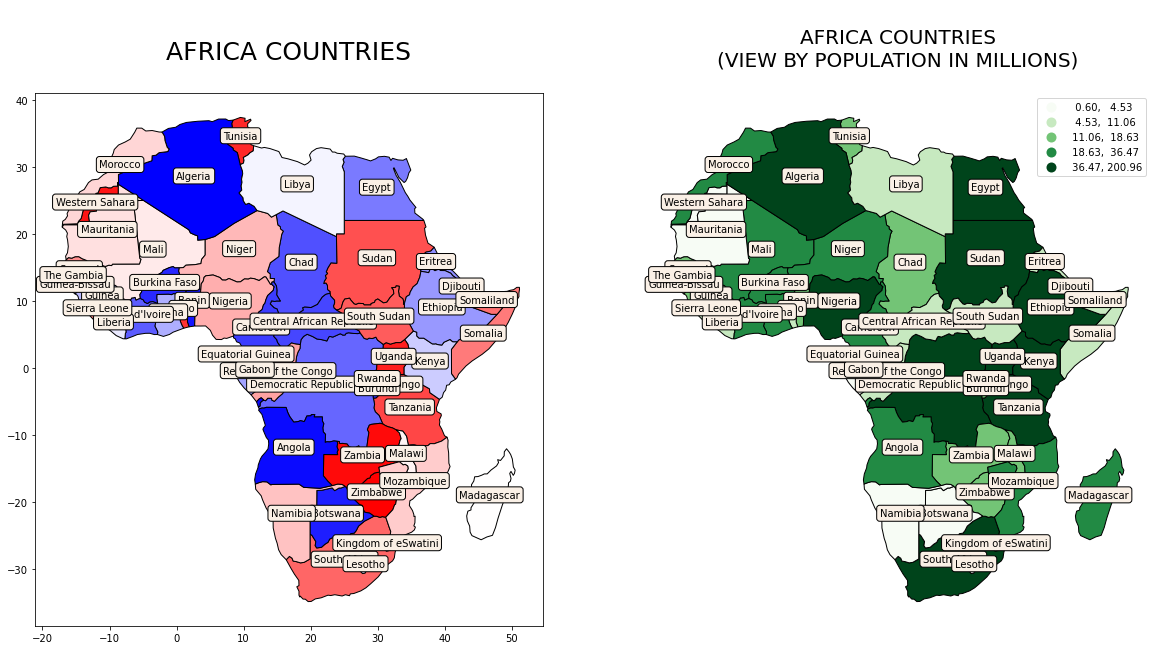

In [11]:
# Plotting side by side maps
fig, axes = plt.subplots(1,2, figsize=(20,15))

# first map axes[0]
africa_df.plot(ax = axes[0], figsize=(10,15), column= 'name_long', cmap= 'bwr', 
                           edgecolor= 'black')
axes[0].set_title('\nAFRICA COUNTRIES\n', fontsize=25)
ax.axis('off')

# names in the map
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in africa_df.iterrows():
  axes[0].text(point[1]['centroid'].x,
          point[1]['centroid'].y,
          point[1]['name_long'],
          horizontalalignment='center',
          fontsize=10,
          bbox=props)

# second map axes[1]
africa_df.plot(ax = axes[1], figsize=(10,15), column= 'popu', cmap= 'Greens', 
                           edgecolor= 'black', scheme='quantiles', legend= True)
axes[1].set_title('\nAFRICA COUNTRIES\n(VIEW BY POPULATION IN MILLIONS)\n', fontsize=20)

# names in the map
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in africa_df.iterrows():
  axes[1].text(point[1]['centroid'].x,
          point[1]['centroid'].y,
          point[1]['name_long'],
          horizontalalignment='center',
          fontsize=10,
          bbox=props)
plt.axis('off')
plt.show()

* Some of the most populated coutries are: South Africa, Nigeria, Egypt, Algeria, Ethopia, Sudan, Tanzania, Democratic republic of congo,uganda, kenya. while djibouti one of the least populated

#### Deep diving into boundaries by country in view

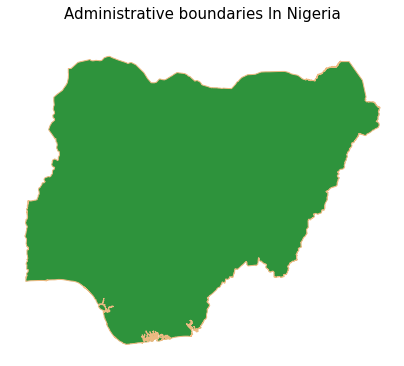

In [12]:
# Nigeria boundary dataset
boundary1 = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/NGA/NGA_AL2_Nigeria.json'

# download the data with request
boundary1_req = requests.get(boundary1).content

# load the json with geopandas and set crs
boundary_df = gpd.read_file(io.StringIO(boundary1_req.decode('utf-8')))
boundary_df = boundary_df[['name', 'geometry']]

# fix the georeference! the map seems to be cliped from a bad reference
boundary_df.to_crs(5389, inplace=True)
boundary_df.to_crs(4326, inplace=True) # now is WGS84 again!

# Plotting the map
ax = boundary_df.plot(figsize=(7,7), color= '#2E933C', edgecolor= '#ECBA82')
ax.set_title('Administrative boundaries In Nigeria\n', fontsize=15)

plt.axis('off')
plt.show()

#### Showing the nigerian map in africa

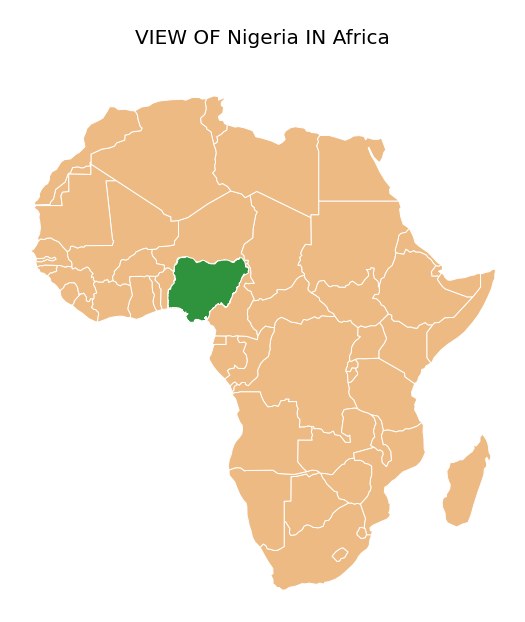

In [13]:
# Plotting Nigeria in Africa
ax = africa_df.plot(figsize=(10,10), color= '#ECBA82', edgecolor= 'white')
boundary_df.plot(ax=ax, color='#2E933C', edgecolor='white')
ax.set_title('\nVIEW OF Nigeria IN Africa\n', fontsize=20)

plt.axis('off')
plt.show()

#### Deep diving into specific forest in consideration by state (Ogun and Crossriver )

In [14]:
# Nigeria State choosed for review: oyo and ogun.

# state dataset
ogun = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/NGA/NGA_AL4_Ogun.json'
crossriver= 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/NGA/NGA_AL4_Cross%20River.json'

# download the data with request
ogun_req = requests.get(ogun).content
crossriver_req = requests.get(crossriver).content

# load the json with geopandas and set crs
ogunboundary_df = gpd.read_file(io.StringIO(ogun_req.decode('utf-8')))
ogunboundary_df = ogunboundary_df[['name', 'geometry']]
ogunboundary_df.set_crs(epsg=4326, inplace=True)
crossriverboundary_df = gpd.read_file(io.StringIO(crossriver_req.decode('utf-8')))
crossriverboundary_df = crossriverboundary_df[['name', 'geometry']]
crossriverboundary_df.set_crs(epsg=4326, inplace=True)

# fix the georeference! the map seems to be cliped from a bad reference
crossriverboundary_df.to_crs(5389, inplace=True)
crossriverboundary_df.to_crs(4326, inplace=True)

print('Ogun dataset has %2d rows and %2d columns' %(ogunboundary_df.shape[0], ogunboundary_df.shape[1]))
print('crossriver dataset has %2d rows and %2d columns' %(crossriverboundary_df.shape[0], crossriverboundary_df.shape[1]))

Ogun dataset has  1 rows and  2 columns
crossriver dataset has  1 rows and  2 columns


In [15]:
crossriverboundary_df

name                                           geometry
0  Cross River  MULTIPOLYGON (((8.14156 4.95736, 8.14143 4.957...

In [16]:
# Using pandas to concatenate the dataframes.
regionsBoundary_df =  pd.concat([crossriverboundary_df, ogunboundary_df], ignore_index=True)

In [17]:
# features for plot
regionsBoundary_df['centroid'] = regionsBoundary_df.geometry.centroid # adding centroid for plotting names in the map

C:\Users\HP\AppData\Local\Temp\ipykernel_17432\2962954293.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  regionsBoundary_df['centroid'] = regionsBoundary_df.geometry.centroid # adding centroid for plotting names in the map


#### Plotting the map of ogun and crossriver

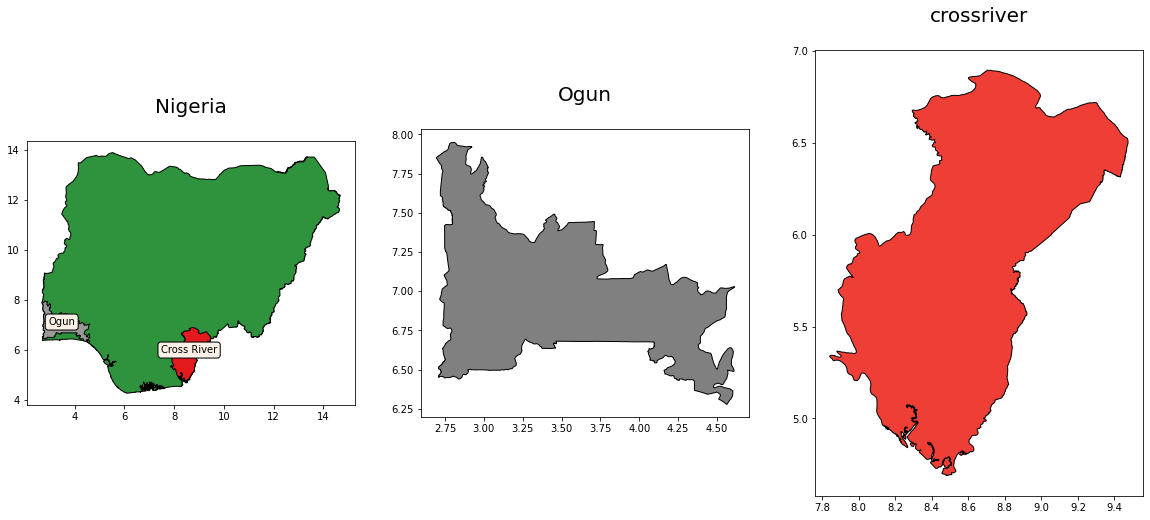

In [18]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,50))

# first map axes[0]
axes[0].set_title('Nigeria\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='#2E933C', edgecolor='black')
regionsBoundary_df.plot(ax=axes[0], column='name', cmap='Set1', edgecolor='black')

# names in the map
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in regionsBoundary_df.iterrows():
  axes[0].text(point[1]['centroid'].x,
          point[1]['centroid'].y,
          point[1]['name'],
          horizontalalignment='center',
          fontsize=10,
          bbox=props)

# second map axes[1]
axes[1].set_title('Ogun\n', fontsize=20)
ogunboundary_df.plot(ax=axes[1], color='grey', edgecolor='black')

# third map axes[2]
axes[2].set_title('crossriver\n', fontsize=20)
crossriverboundary_df.plot(ax=axes[2], color='#EF3E36', edgecolor='black')

plt.show()

<a id='Soil'></a>
## Soil resources

### 2.1 World Soil Resources

In [19]:
# World Soil resources
soil1 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson'

# download the data with request
soil1_req = requests.get(soil1).content

# load the json with geopandas
soil_df = gpd.read_file(io.StringIO(soil1_req.decode('utf-8')))
soil_df.set_crs(epsg=4326, inplace=True)

# fixing the data: standardizing column names
soil_df.columns = soil_df.columns.str.lower()

print('World Soil resources dataset has %2d rows and %2d columns' %(soil_df.shape[0], soil_df.shape[1]))

World Soil resources dataset has 33 rows and  3 columns


### Graphical representation of World Soil Resources

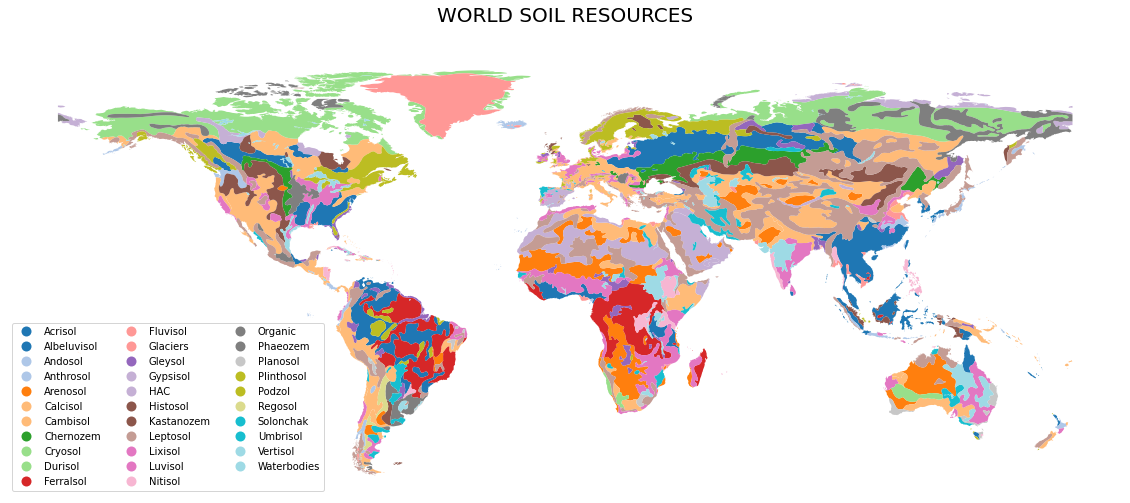

In [20]:
# plotting the map
ax = soil_df.plot(figsize = (20,10), column = 'ipcc', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower left', 'ncol': 3})
ax.set_title('WORLD SOIL RESOURCES\n', fontsize=20)

plt.axis('off')
plt.show()

### Africa Soil Resources

In [21]:
# Using geopandas to clip soil_df in the shape of south_america_df
africasoil_df = soil_df.clip(africa_df)
africasoil_df= africasoil_df.reset_index(drop=True) # removing index

In [22]:
africasoil_df.head(2)

sname         ipcc                                           geometry
0    GL      Gleysol  MULTIPOLYGON (((38.28120 18.03124, 38.19812 17...
1   WAT  Waterbodies  MULTIPOLYGON (((-3.96073 5.27866, -4.01422 5.3...

### Graphical representation of Africa Soil Resources

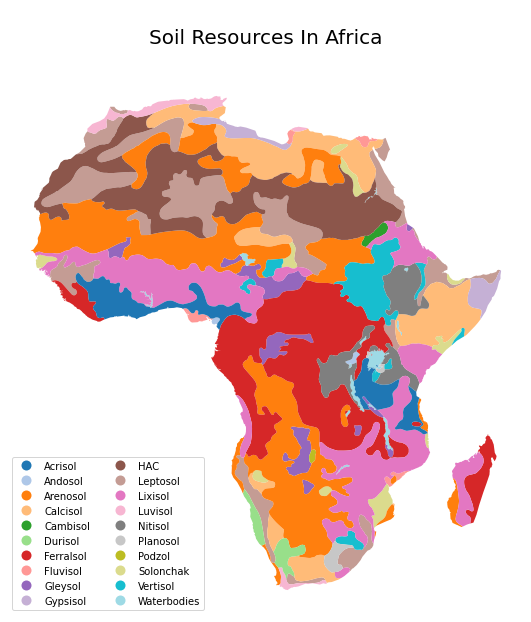

In [23]:
# plotting the map
ax = africasoil_df.plot(figsize = (30,10), column = 'ipcc', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower left','ncol': 2})
ax.set_title('\nSoil Resources In Africa\n', fontsize=20)

plt.axis('off')
plt.show()

### Nigerian Soil Resources

In [24]:
# Peru Soil resources
Nigeriansoil1 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byCountry/NGA_AL2_Nigeria_WSR.json'

# download the data with request
Nigeriansoil1_req = requests.get(Nigeriansoil1).content

# load the json with geopandas
Nigeriansoil1_df = gpd.read_file(io.StringIO(Nigeriansoil1_req.decode('utf-8')))

# fix the georeference the map seems to be cliped from a bad reference
Nigeriansoil1_df.to_crs(5389, inplace=True)
Nigeriansoil1_df.to_crs(4326, inplace=True) # now is WGS84

# fixing the data
# standardizing column names
Nigeriansoil1_df.columns = Nigeriansoil1_df.columns.str.lower()

# drop useless columns
Nigeriansoil1_df = Nigeriansoil1_df[['sname', 'ipcc', 'geometry']]

print('Nigerian Soil resources dataset has %2d rows and %2d columns' %(Nigeriansoil1_df.shape[0], Nigeriansoil1_df.shape[1]))

Nigerian Soil resources dataset has  7 rows and  3 columns


In [25]:
Nigeriansoil1_df.head(2)

sname      ipcc                                           geometry
0    AC   Acrisol  MULTIPOLYGON (((11.51914 6.61451, 11.51960 6.6...
1    AR  Arenosol  POLYGON ((5.83178 13.76125, 5.78032 13.78030, ...

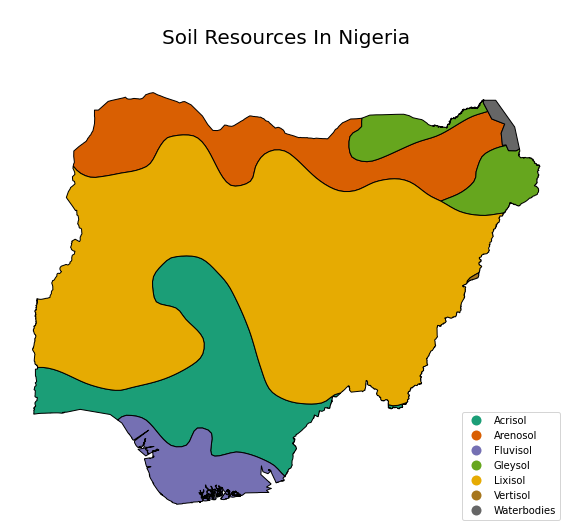

In [26]:
# plotting the map
ax = Nigeriansoil1_df.plot(figsize = (10,10), column = 'ipcc',
                  edgecolor='black', cmap='Dark2', legend= True, 
                  legend_kwds= {'loc': 'lower right'})
ax.set_title('\nSoil Resources In Nigeria\n', fontsize=20)

plt.axis('off')
plt.show()

### Soil resources for Crossriver

In [27]:
# state (Departamento) dataset
Crossriver2 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byStateWSR/NGA/NGA_AL4_Cross%20River_WSR.json'
Ogun2 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byStateWSR/NGA/NGA_AL4_Ogun_WSR.json'

# download the data with request
Crossriver2_req = requests.get(Crossriver2).content
Ogun2_req = requests.get(Ogun2).content

# load the json with geopandas and set_crs
CrossriverSoil_df = gpd.read_file(io.StringIO(Crossriver2_req.decode('utf-8')))
OgunSoil_df = gpd.read_file(io.StringIO(Ogun2_req.decode('utf-8')))

# fix the georeference! the map seems to be cliped from a bad reference
CrossriverSoil_df.to_crs(5389, inplace=True)
CrossriverSoil_df.to_crs(4326, inplace=True)
OgunSoil_df.to_crs(5389, inplace=True)
OgunSoil_df.to_crs(4326, inplace=True)

# fixing the data
# standardizing column names
CrossriverSoil_df.columns = CrossriverSoil_df.columns.str.lower()
OgunSoil_df.columns = OgunSoil_df.columns.str.lower()

# drop useless columns
CrossriverSoil_df = CrossriverSoil_df[['sname', 'ipcc', 'geometry']]
OgunSoil_df = OgunSoil_df[['sname', 'ipcc', 'geometry']]

print('Crossriver\'s Soil dataset has %2d rows and %2d columns' %(CrossriverSoil_df.shape[0], CrossriverSoil_df.shape[1]))
print('Ogun\'s Soil dataset has %2d rows and %2d columns' %(OgunSoil_df.shape[0], OgunSoil_df.shape[1]))

Crossriver's Soil dataset has  3 rows and  3 columns
Ogun's Soil dataset has  2 rows and  3 columns


In [28]:
CrossriverSoil_df

sname      ipcc                                           geometry
0    AC   Acrisol  POLYGON ((8.54653 6.75898, 8.54413 6.75859, 8....
1    FL  Fluvisol  MULTIPOLYGON (((8.65211 4.91600, 8.56842 4.997...
2    LX   Lixisol  POLYGON ((9.38266 6.61721, 9.38165 6.61849, 9....

In [29]:
OgunSoil_df

sname     ipcc                                           geometry
0    AC  Acrisol  POLYGON ((3.08021 7.44243, 3.04750 7.45014, 2....
1    LX  Lixisol  MULTIPOLYGON (((3.08021 7.44243, 3.07938 7.445...

### Soil resources Regions

In [30]:
# Using pandas to concatenate the dataframes.
regionSoil_df =  pd.concat([OgunSoil_df, CrossriverSoil_df], ignore_index=True)

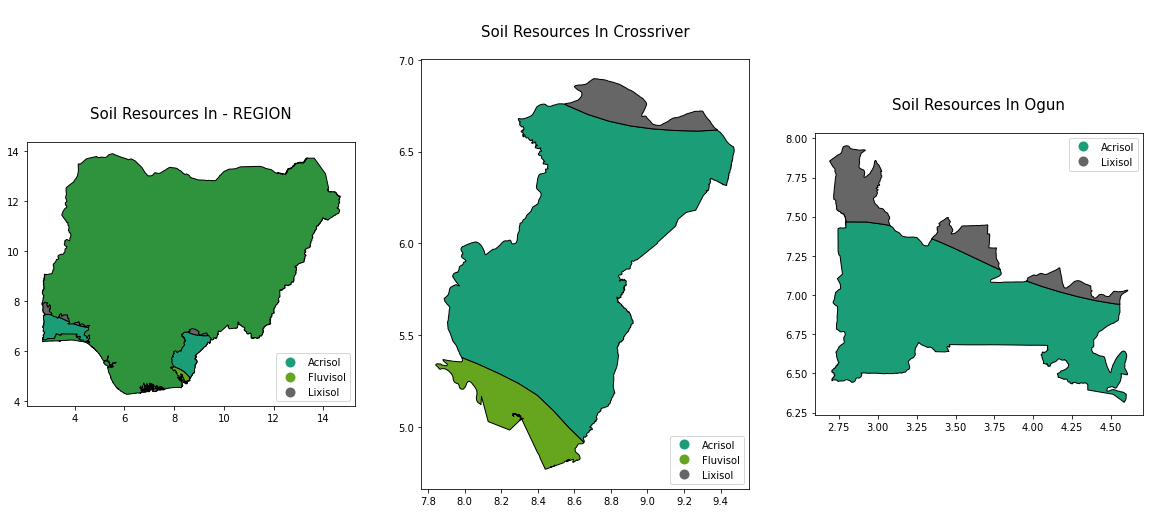

In [31]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,50))

# first map axes[0]
axes[0].set_title('\nSoil Resources In - REGION\n', fontsize=15)
boundary_df.plot(ax=axes[0], color='#2E933C', edgecolor='black')
regionSoil_df.plot(ax=axes[0], column='ipcc', cmap='Dark2', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower right'})

# Second map axes[2]
axes[1].set_title('\nSoil Resources In Crossriver\n', fontsize=15)
CrossriverSoil_df.plot(ax=axes[1], column='ipcc', cmap='Dark2', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower right'})

# third map axes[2]
axes[2].set_title('\nSoil Resources In Ogun\n', fontsize=15)
OgunSoil_df.plot(ax=axes[2], column='ipcc', cmap='Dark2', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})

plt.show()

<a id='Bioclimatic'></a>
## Bioclimatic & Ecological Zone

### Biodiversity Hotspots

#### World Biodiversity Hotspots

In [32]:
# Biodiversity Hotspots dataset
bioHot = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson'

# download the data with request
bioHot_req = requests.get(bioHot).content

# load the json with geopandas
bioHot_df = gpd.read_file(io.StringIO(bioHot_req.decode('utf-8')))
bioHot_df.set_crs(epsg=4326, inplace=True)

# fixing the data: standardizing column names
bioHot_df.columns = bioHot_df.columns.str.lower()

print('The Biodiversity Hotspots dataset has %2d rows and %2d columns' %(bioHot_df.shape[0], bioHot_df.shape[1]))

The Biodiversity Hotspots dataset has 53 rows and  6 columns


In [33]:
bioHot_df.head()

objectid                                           name          type  \
0         1  Chilean Winter Rainfall and Valdivian Forests  hotspot area   
1         2  Chilean Winter Rainfall and Valdivian Forests   outer limit   
2         3                          Cape Floristic Region  hotspot area   
3         4                    Maputaland-Pondoland-Albany  hotspot area   
4         5                                  New Caledonia  hotspot area   

   shape_length  shape_area                                           geometry  
0    200.706891   40.754665  MULTIPOLYGON (((-74.59792 -46.92502, -74.61111...  
1    191.174978  186.085694  POLYGON ((-70.30946 -22.96028, -70.48596 -22.7...  
2     93.790123    7.610383  MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -...  
3     49.631419   25.366584  MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -...  
4     24.637100    1.646954  MULTIPOLYGON (((167.46053 -22.71228, 167.46161...

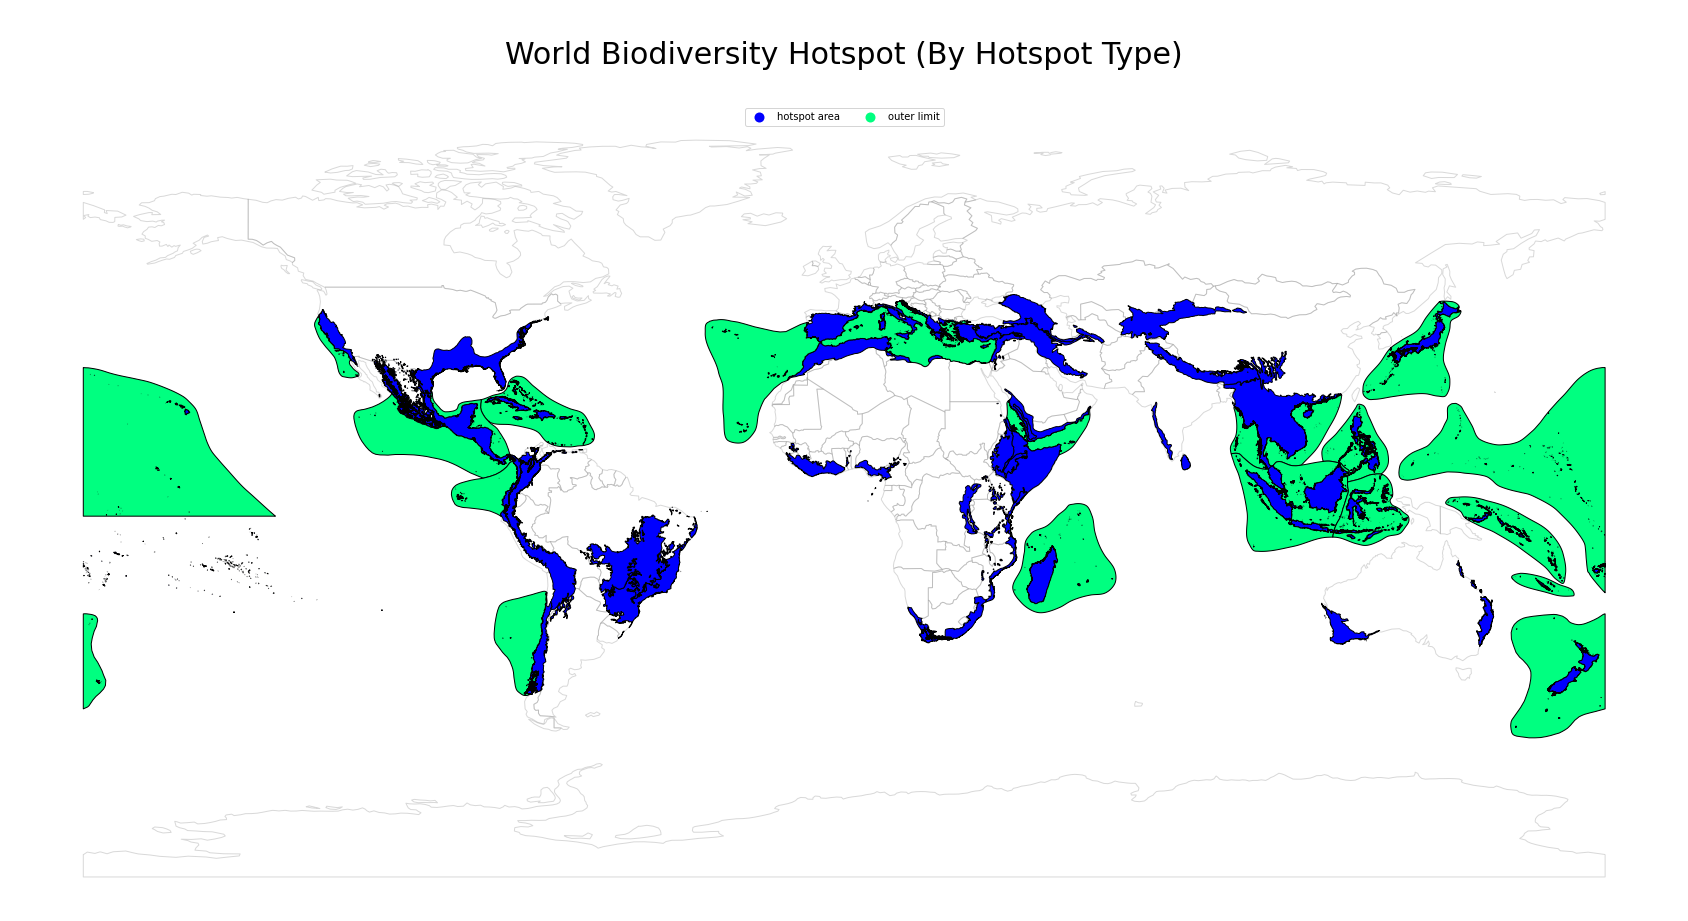

In [34]:
# Plotting the map
ax = world_df.plot(figsize=(30,30), color='none', edgecolor='grey', alpha=0.3)
bioHot_df.plot(ax = ax, column= 'type', cmap= 'winter', edgecolor= 'black', legend= True, 
                   legend_kwds={'loc': 'upper center', 'ncol': 15})
ax.set_title('\nWorld Biodiversity Hotspot (By Hotspot Type)\n', fontsize=30)

plt.axis('off')
plt.show()

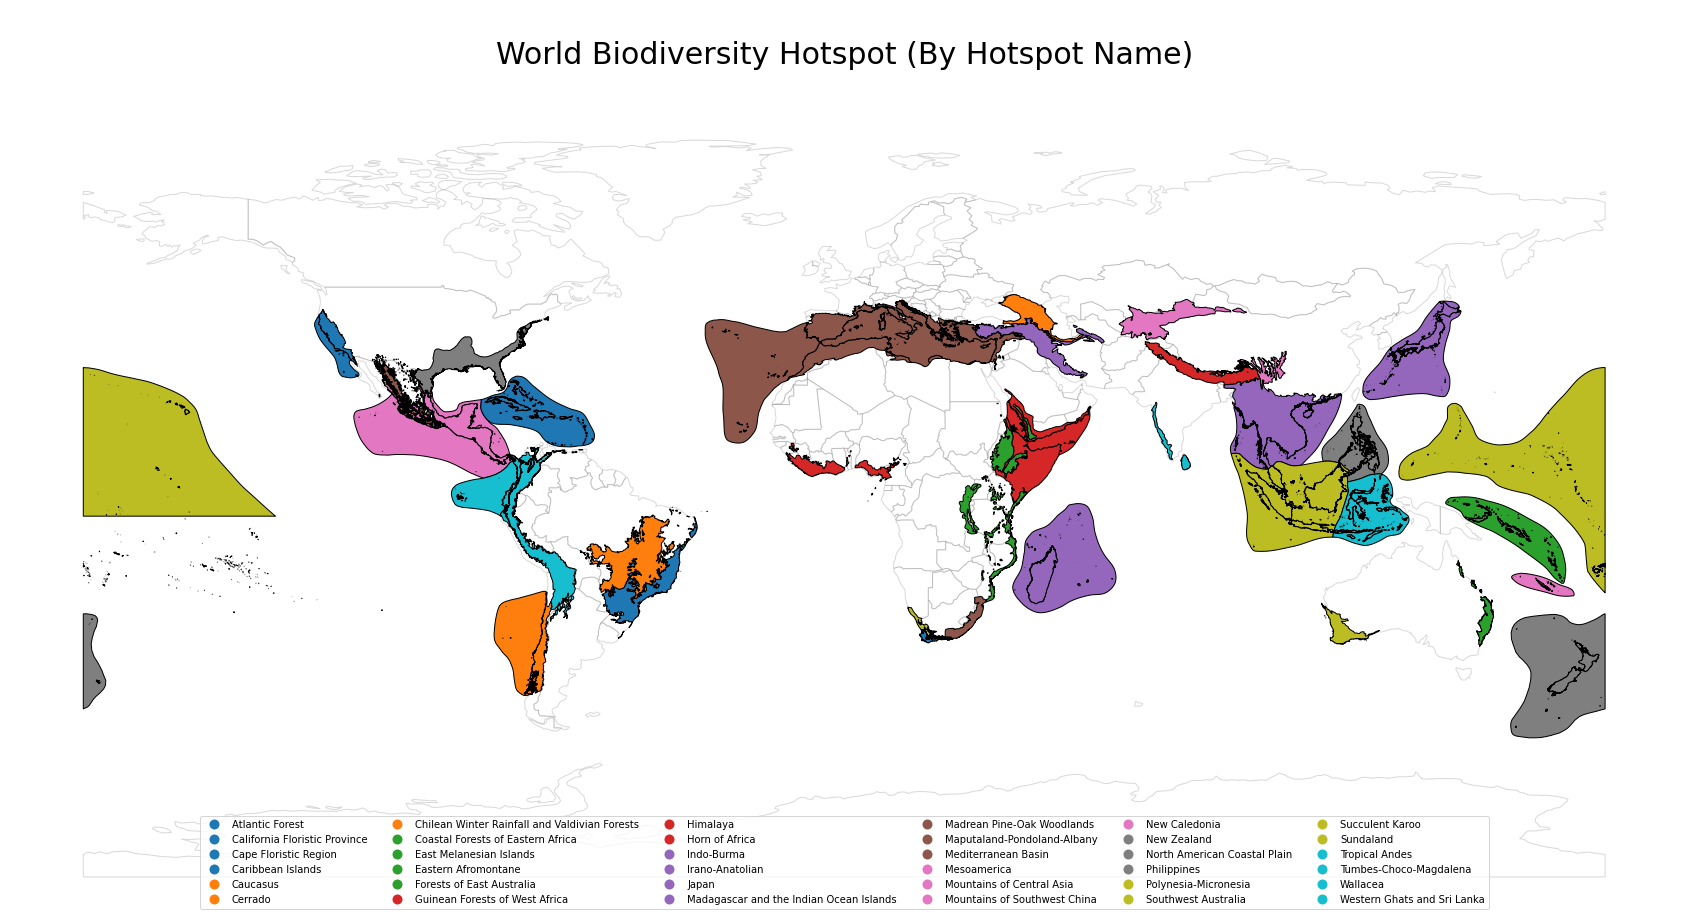

In [35]:
# Plotting the map
ax = world_df.plot(figsize=(30,30), color='none', edgecolor='grey', alpha=0.3)
bioHot_df.plot(ax = ax, column= 'name', cmap= 'tab10', edgecolor= 'black', legend= True, 
                       legend_kwds={'loc': 'lower center', 'ncol': 6})
ax.set_title('\nWorld Biodiversity Hotspot (By Hotspot Name)\n', fontsize=30)

plt.axis('off')
plt.show()

### Africa Biodiversity Hotspots

In [36]:
# creating dataframe
AfricaBioHot_df = bioHot_df.clip(africa_df)
AfricaBioHot_df = AfricaBioHot_df.reset_index(drop=True)

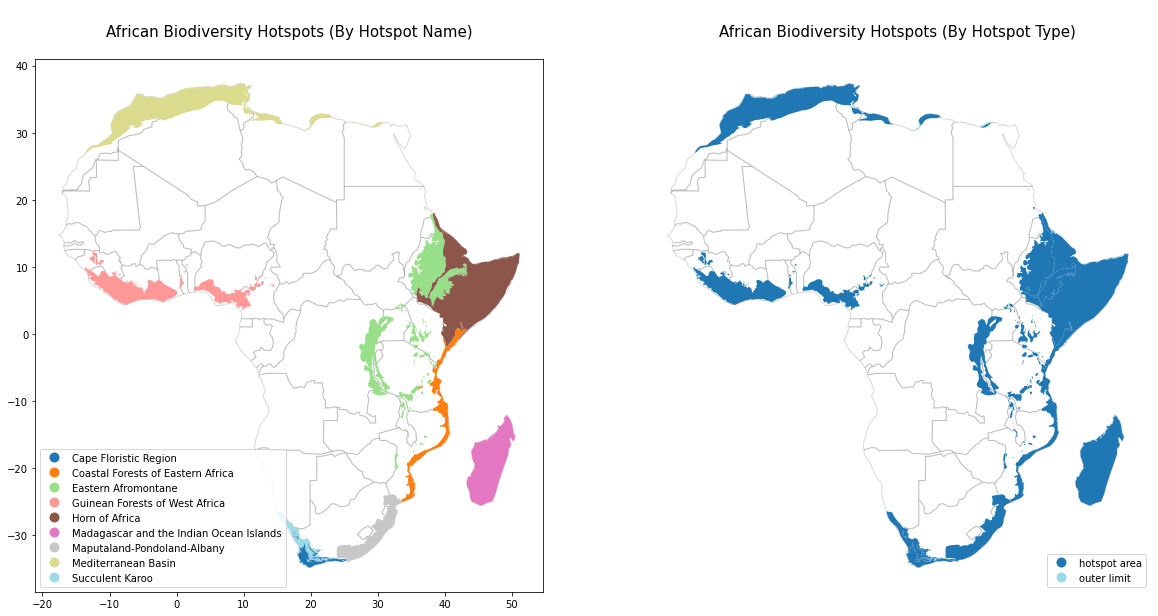

In [37]:
# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(20,50))

# first map axes[0]
axes[0].set_title('\nAfrican Biodiversity Hotspots (By Hotspot Name)\n', fontsize=15)
africa_df.plot(ax=axes[0], color='none', edgecolor='grey', alpha=0.3)
AfricaBioHot_df.plot(ax=axes[0], column = 'name', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower left', 'ncol': 1})

# second map axes[1]
axes[1].set_title('\nAfrican Biodiversity Hotspots (By Hotspot Type)\n', fontsize=15)
africa_df.plot(ax=axes[1], color='none', edgecolor='grey', alpha=0.3)
AfricaBioHot_df.plot(ax=axes[1], column = 'type', cmap='tab20', legend= True, 
                  legend_kwds={'loc': 'lower right'})
plt.axis('off')
plt.show()

### Nigerian Biodiversity Hotspots

In [38]:
# creating dataframe
NigeriaBioHot_df = bioHot_df.clip(boundary_df)
NigeriaBioHot_df = NigeriaBioHot_df.reset_index(drop=True)

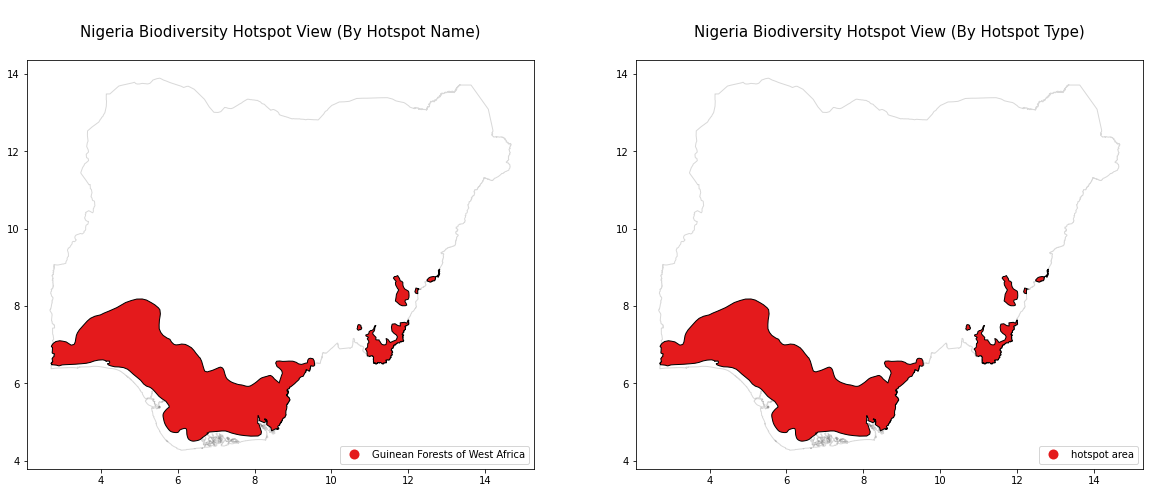

In [39]:
# Plotting in the maps
fig, axes = plt.subplots(1,2, figsize=(20,50))

# first map axes[0]
axes[0].set_title('\nNigeria Biodiversity Hotspot View (By Hotspot Name)\n', fontsize=15)
boundary_df.plot(ax=axes[0], color='none', edgecolor='grey', alpha=0.3)
NigeriaBioHot_df.plot(ax=axes[0], column = 'name', cmap='Set1', edgecolor='black', legend= True, 
                  legend_kwds={'loc': 'lower right'})

# second map axes[1]
axes[1].set_title('\nNigeria Biodiversity Hotspot View (By Hotspot Type)\n', fontsize=15)
boundary_df.plot(ax=axes[1], color='none', edgecolor='grey', alpha=0.3)
NigeriaBioHot_df.plot(ax=axes[1], column = 'type', cmap='Set1', edgecolor='black', legend= True, 
                  legend_kwds={'loc': 'lower right'})

plt.show()

### Biodiversity Hotspots of ogun and crossriver

In [40]:
# creating dataframe
CrossriverBioHot_df = bioHot_df.clip(crossriverboundary_df)
CrossriverBioHot_df = CrossriverBioHot_df.reset_index(drop=True)
ogunBioHot_df = bioHot_df.clip(ogunboundary_df)
ogunBioHot_df = ogunBioHot_df.reset_index(drop=True)

In [41]:
# Using pandas to concatenate the dataframes.
regionsBioHot_df = pd.concat([ogunBioHot_df, CrossriverBioHot_df], ignore_index=True)

### Plotting Biodiversity Hotspot By Name

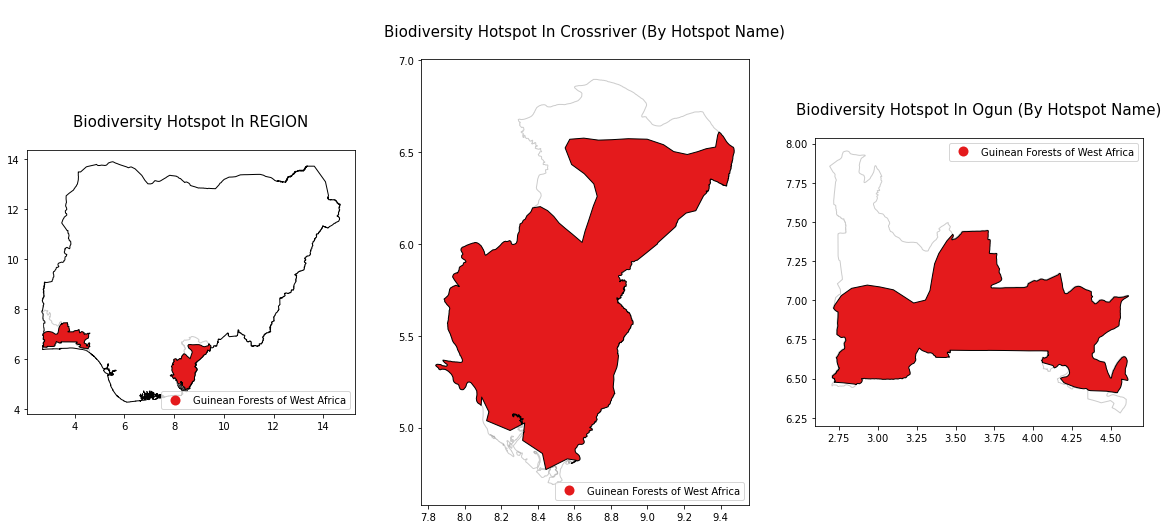

In [42]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,50))

# first map axes[0]
axes[0].set_title('\nBiodiversity Hotspot In REGION\n', fontsize=15)
boundary_df.plot(ax=axes[0], color='none', edgecolor='black')
regionsBoundary_df.plot(ax=axes[0], color='none', edgecolor='grey',  alpha=0.4)
regionsBioHot_df.plot(ax=axes[0], column='name', cmap='Set1', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower right'})

# second map axes[1]
axes[1].set_title('\nBiodiversity Hotspot In Crossriver (By Hotspot Name)\n', fontsize=15)
crossriverboundary_df.plot(ax=axes[1], color='none', edgecolor='grey',  alpha=0.4)
CrossriverBioHot_df.plot(ax=axes[1], column='name', cmap='Set1', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower right'})

# third map axes[2]
axes[2].set_title('\nBiodiversity Hotspot In Ogun (By Hotspot Name)\n', fontsize=15)
ogunboundary_df.plot(ax=axes[2], color='none', edgecolor='grey',  alpha=0.4)
ogunBioHot_df.plot(ax=axes[2], column='name', cmap='Set1', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})

plt.show()

### Plotting Biodiversity Hotspot By Type

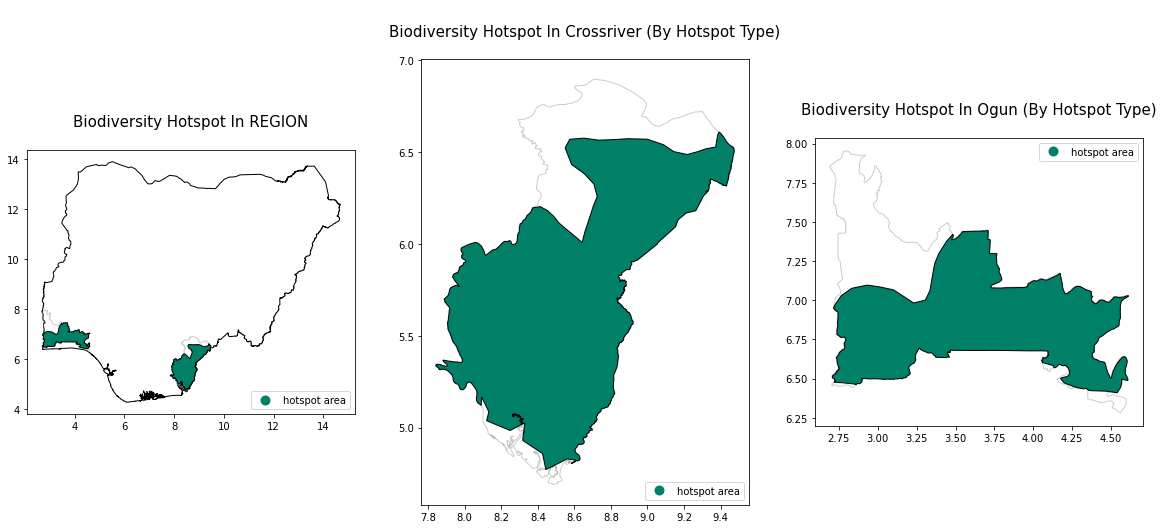

In [43]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,20))

# first map axes[0]
axes[0].set_title('\nBiodiversity Hotspot In REGION\n', fontsize=15)
boundary_df.plot(ax=axes[0], color='none', edgecolor='black')
regionsBoundary_df.plot(ax=axes[0], color='none', edgecolor='grey',  alpha=0.4)
regionsBioHot_df.plot(ax=axes[0], column='type', cmap='summer', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower right'})

# second map axes[1]
axes[1].set_title('\nBiodiversity Hotspot In Crossriver (By Hotspot Type)\n', fontsize=15)
crossriverboundary_df.plot(ax=axes[1], color='none', edgecolor='grey',  alpha=0.4)
CrossriverBioHot_df.plot(ax=axes[1], column='type', cmap='summer', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower right'})

# third map axes[2]
axes[2].set_title('\nBiodiversity Hotspot In Ogun (By Hotspot Type)\n', fontsize=15)
ogunboundary_df.plot(ax=axes[2], color='none', edgecolor='grey',  alpha=0.4)
ogunBioHot_df.plot(ax=axes[2], column='type', cmap='summer', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})

plt.show()

### Agro ecological zones

#### World Agro ecological zones

In [44]:
# All Agro Ecological Zones dataset
agroEco = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson'

# download the data with request
agroEco_req = requests.get(agroEco).content

# load the json with geopandas
agroEco_df = gpd.read_file(io.StringIO(agroEco_req.decode('utf-8')))
agroEco_df.set_crs(epsg=4326, inplace=True)

print('Global Agro Ecological Zones dataset has %2d rows and %2d columns.' %(agroEco_df.shape[0], agroEco_df.shape[1]))

Global Agro Ecological Zones dataset has 116675 rows and  2 columns.


In [45]:
agroEco_df.head()

Value                                           geometry
0      1  POLYGON ((-33.50000 83.65000, -33.50000 83.500...
1      1  POLYGON ((-37.85000 83.60000, -37.85000 83.500...
2      1  POLYGON ((-32.35000 83.60000, -32.35000 83.500...
3      1  POLYGON ((-31.25000 83.60000, -31.25000 83.500...
4      1  POLYGON ((-34.25000 83.60000, -34.25000 83.500...

In [46]:
# fixing the data
values = {'1': 'Wheat', '2': 'Rice', '3': 'Maize', '4': 'Sorghum', '5': 'Millet', 
          '6': 'Other cereals', '7': 'Tubers', '8': 'Roots', '9': 'Sugar beet', 
          '10': 'Sugarcane', '11': 'Pulses', '12': 'Soybean', '13': 'Rape', 
          '14': 'Sunflower', '15': 'Groundnut', '16': 'Oil Palm', '17': 'Olive', 
          '18': 'Cotton', '19': 'Cash 1', '20': 'Vegetables', '21': 'Cash 2', 
          '22': 'Fodder', '23': 'Residual'}

# standardizing column names
agroEco_df.columns = agroEco_df.columns.str.lower()

# renaming class_name
agroEco_df.value = agroEco_df.value.astype('str').replace(values)

#### Plotting the map

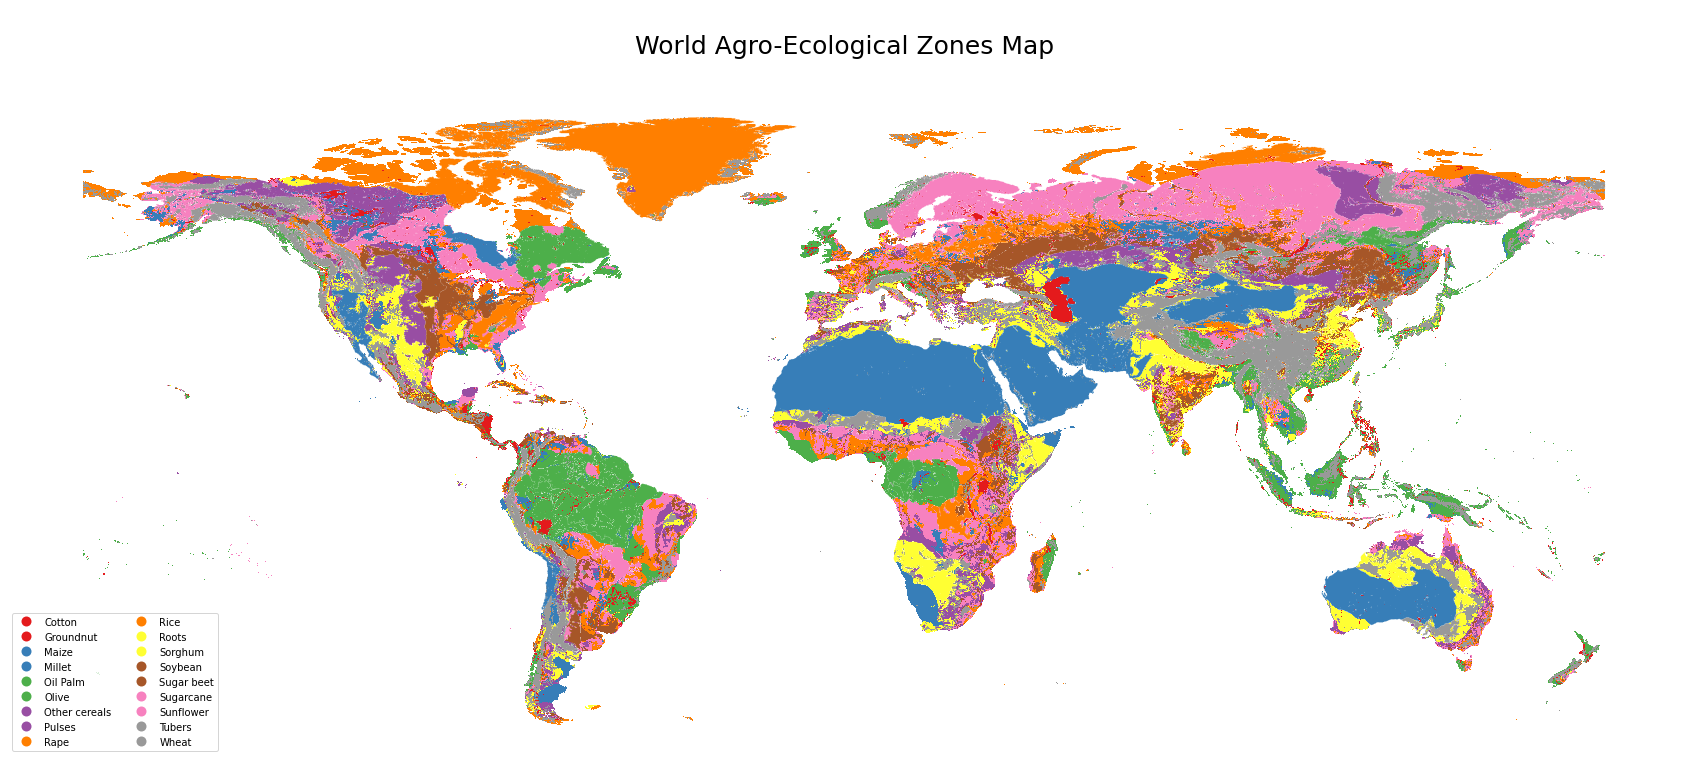

In [47]:
# plotting the map
ax = agroEco_df.plot(figsize = (30,25), column = 'value',
                     legend= True, legend_kwds= {'loc': 'lower left','ncol': 2}, cmap='Set1')
ax.set_title('\nWorld Agro-Ecological Zones Map\n', fontsize=25)

plt.axis('off')
plt.show()

#### Agro ecological zones in Africa

In [48]:
# creating dataframe
africaagroEco_df = agroEco_df.clip(africa_df)
africaagroEco_df = africaagroEco_df.reset_index(drop=True)

#### Plotting Maps

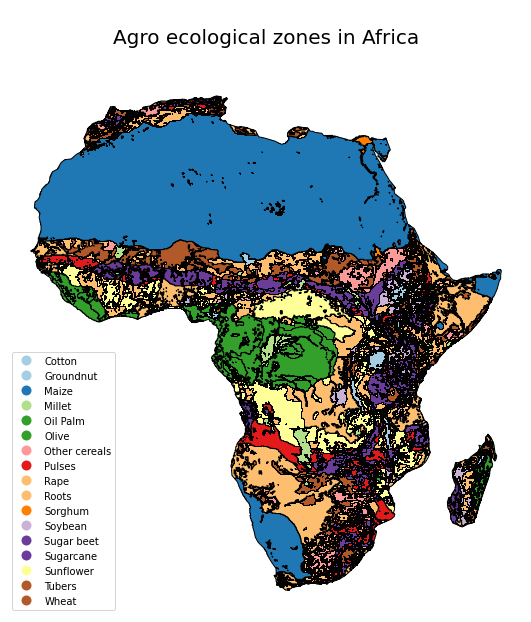

In [71]:
# Plotting in the maps
ax = africaagroEco_df.plot(figsize=(10,10), edgecolor='black', column = 'value', cmap='Paired',
                                    legend= True, legend_kwds={'loc': 'lower left'})
ax.set_title('\nAgro ecological zones in Africa\n', fontsize=20)

plt.axis('off')
plt.show()

<li>Quite interesting to note the vast amount of Maize domination in some certain areas in africa, Egypt inclusive.
<li>It is also worthy of nothing that africa is diversed with differen agro ecology.

#### Agro ecological zones of Nigeria

In [50]:
# creating dataframe
NigeriaagroEco_df = agroEco_df.clip(boundary_df)
NigeriaagroEco_df = NigeriaagroEco_df.reset_index(drop=True)

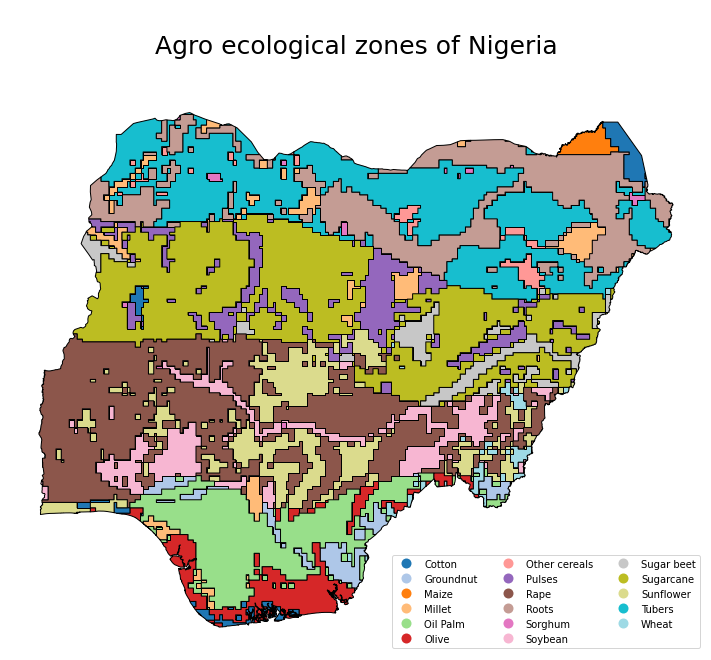

In [51]:
# Plotting in the maps
ax = NigeriaagroEco_df.plot(figsize=(12.5,12.5), edgecolor='black', column = 'value', cmap='tab20',
                                    legend= True, legend_kwds={'loc': 'lower right','ncol': 3})
ax.set_title('\nAgro ecological zones of Nigeria\n', fontsize=25)

plt.axis('off')
plt.show()

### Agro ecological zones of Crossriver and Ogun

In [52]:
# creating dataframe
crossriveragroEco_df = agroEco_df.clip(crossriverboundary_df)
crossriveragroEco_df = crossriveragroEco_df.reset_index(drop=True)
ogunagroEco_df = agroEco_df.clip(ogunboundary_df)
ogunagroEco_df = ogunagroEco_df.reset_index(drop=True)

#### Agro ecological zones of of both States

In [53]:
# Using pandas to concatenate the dataframes.
regionsagroEco_df = pd.concat([crossriveragroEco_df, ogunagroEco_df], ignore_index=True)

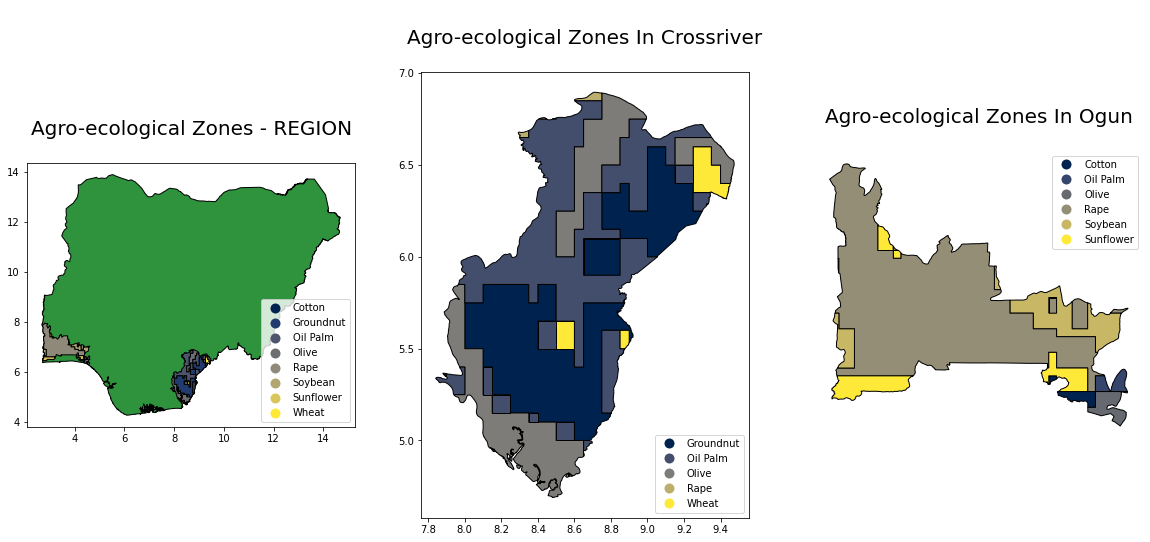

In [54]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,20))

# first map axes[0]
axes[0].set_title('\nAgro-ecological Zones - REGION\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='#2E933C', edgecolor='black')
regionsagroEco_df.plot(ax=axes[0], column='value', cmap='cividis', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower right','ncol': 1})

# second map axes[1]
axes[1].set_title('\nAgro-ecological Zones In Crossriver\n', fontsize=20)
crossriveragroEco_df.plot(ax=axes[1], column='value', cmap='cividis', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower right'})

# third map axes[2]
axes[2].set_title('\nAgro-ecological Zones In Ogun\n', fontsize=20)
ogunagroEco_df.plot(ax=axes[2], column='value', cmap='cividis', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})

plt.axis('off')
plt.show()

> We have more oil Palm & Groundnut predominant in Crossriver, while olive and Rape are predominant in Ogun State

<a id='Landcover'></a>
## Land Cover

#### Planted Forest in Nigeria

In [55]:
# Nigerian Planted Forest dataset
forest = 'https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/Planted_Forests_SDPT/NGA_Nigeria_SDPT.json'

# download the data with request
forest_req = requests.get(forest).content

# load the json with geopandas
forest_df = gpd.read_file(io.StringIO(forest_req.decode('utf-8')))
forest_df.to_crs(epsg=4326)

# fixing the data
# removing Unkown data
forest_df = forest_df.replace('Unknown', np.nan)
forest_df = forest_df.replace('n/a', np.nan)

# subseting important variables
forest_df = forest_df.rename(columns = {'size':'size_tree'})
forest_df = forest_df[['species', 'species_simp', 'common_name', 'plant_ag', 
                       'timber_ag','ever_dec', 'conifer_broad', 'hard_soft', 
                       'size_tree', 'year', 'org_name', 'geometry']]

print('Nigerian Planted Forest dataset has %2d rows and %2d columns' %(forest_df.shape[0], forest_df.shape[1]))

Nigerian Planted Forest dataset has 85 rows and 12 columns


In [56]:
forest_df.head()

species species_simp common_name    plant_ag   timber_ag  \
0  Elaeis guineensis    Oil Palm     Oil Palm  Tree crops  Tree crops   
1  Elaeis guineensis    Oil Palm     Oil Palm  Tree crops  Tree crops   
2  Elaeis guineensis    Oil Palm     Oil Palm  Tree crops  Tree crops   
3  Elaeis guineensis    Oil Palm     Oil Palm  Tree crops  Tree crops   
4  Elaeis guineensis    Oil Palm     Oil Palm  Tree crops  Tree crops   

   ever_dec  conifer_broad  hard_soft  size_tree       year  org_name  \
0       NaN            NaN        NaN        NaN  2013-2015  oil palm   
1       NaN            NaN        NaN        NaN  2013-2015  oil palm   
2       NaN            NaN        NaN        NaN  2013-2015  oil palm   
3       NaN            NaN        NaN        NaN  2013-2015  oil palm   
4       NaN            NaN        NaN        NaN  2013-2015  oil palm   

                                            geometry  
0  POLYGON ((6.73408 5.07584, 6.73217 5.09476, 6....  
1  POLYGON ((6.93543 5.18647, 6.90801 5.18638, 6....  
2  POLYGON ((6.82456 5.30529, 6.82322 5.30431, 6....  
3  POLYGON ((6.82203 5.31630, 6.82144 5.31719, 6....  
4  POLYGON ((6.78512 5.32028, 6.78444 5.32236, 6....

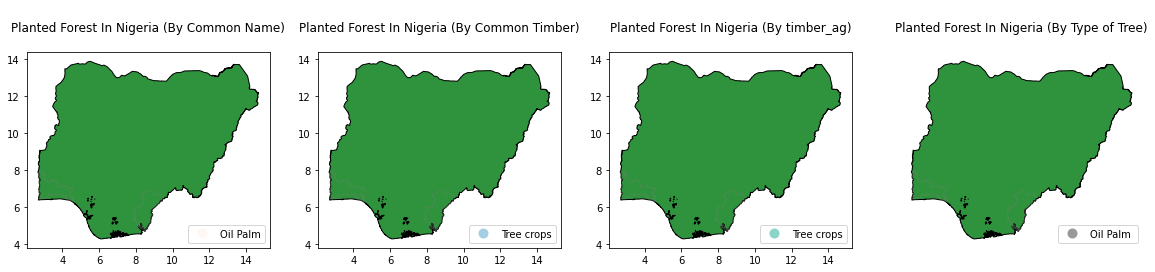

In [57]:
# Plotting in the maps
fig, axes = plt.subplots(1,4, figsize=(20,20))

# first map axes[0]
axes[0].set_title('\nPlanted Forest In Nigeria (By Common Name)\n')
boundary_df.plot(ax=axes[0], color='#2E933C', edgecolor='black')
regionsBoundary_df.plot(ax=axes[0], color='none', edgecolor='grey', alpha=0.3)
forest_df.plot(ax=axes[0], column='common_name', edgecolor='black', markersize=15, cmap='RdPu',
             legend=True, legend_kwds={'loc': 'lower right'})

# second map axes[1]
axes[1].set_title('\nPlanted Forest In Nigeria (By Common Timber)\n')
boundary_df.plot(ax=axes[1], color='#2E933C', edgecolor='black')
regionsBoundary_df.plot(ax=axes[1], color='none', edgecolor='grey', alpha=0.3)
forest_df.plot(ax=axes[1], column='timber_ag', edgecolor='black', markersize=15, cmap='Paired',
             legend=True, legend_kwds={'loc': 'lower right'})

# third map axes[2]
axes[2].set_title('\nPlanted Forest In Nigeria (By timber_ag)\n')
boundary_df.plot(ax=axes[2], color='#2E933C', edgecolor='black')
regionsBoundary_df.plot(ax=axes[2], color='none', edgecolor='grey', alpha=0.3)
forest_df.plot(ax=axes[2], column='timber_ag', edgecolor='black', markersize=15, cmap='Set3',
             legend=True, legend_kwds={'loc': 'lower right'})

# third map axes[2]
axes[3].set_title('\nPlanted Forest In Nigeria (By Type of Tree)\n')
boundary_df.plot(ax=axes[3], color='#2E933C', edgecolor='black')
regionsBoundary_df.plot(ax=axes[3], color='none', edgecolor='grey', alpha=0.3)
forest_df.plot(ax=axes[3], column='species_simp', edgecolor='black', markersize=15, cmap='Set1_r',
             legend=True, legend_kwds={'loc': 'lower right'})

plt.axis('off')
plt.show()

<a id='Climate'></a>
## Climate

### World Climate Zones

In [58]:
# Climate Zones dataset
climate = 'https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'

# download the data with request
climate_req = requests.get(climate).content

# load the json with geopandas
climate_df = gpd.read_file(io.StringIO(climate_req.decode('utf-8')))
climate_df.set_crs(epsg=4326, inplace=True)

# standardizing column names
climate_df.columns = climate_df.columns.str.lower()

print('World Climate Zones dataset has %2d rows and %2d columns.' %(climate_df.shape[0], climate_df.shape[1]))

World Climate Zones dataset has 26165 rows and  2 columns.


In [59]:
climate_df.head()

class_name                                           geometry
0           0  MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...
1           0  MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...
2           0  MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ...
3           0  MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ...
4           5  MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ...

In [60]:
# Replacing the data that was in codes
classification =  {'1': 'Tropical montane', '2' : 'Tropical wet', 
                   '3': 'Tropical moist', '4': 'Tropical dry', 
                   '5': 'Warm temperate moist', '6': 'Warm temperate dry',
                   '7': 'Cool temperate moist', '8': 'Cool temperate dry',
                   '9': 'Boreal moist', '10': 'Boreal dry', '11' : 'Polar moist',
                   '12': 'Polar dry'}


# renaming class_name
climate_df.class_name = climate_df.class_name.astype('str').replace(classification)

# removing oceans
climate_df =  climate_df.loc[climate_df.class_name != '0']

In [61]:
climate_df.head()

class_name                                           geometry
4   Warm temperate moist  MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ...
5   Warm temperate moist  MULTIPOLYGON (((-41.60000 83.35000, -41.60000 ...
6   Warm temperate moist  MULTIPOLYGON (((-40.75000 83.25000, -40.75000 ...
10    Warm temperate dry  MULTIPOLYGON (((-76.25000 83.10000, -76.25000 ...
11    Warm temperate dry  MULTIPOLYGON (((-75.10000 83.10000, -75.10000 ...

#### plotting the map

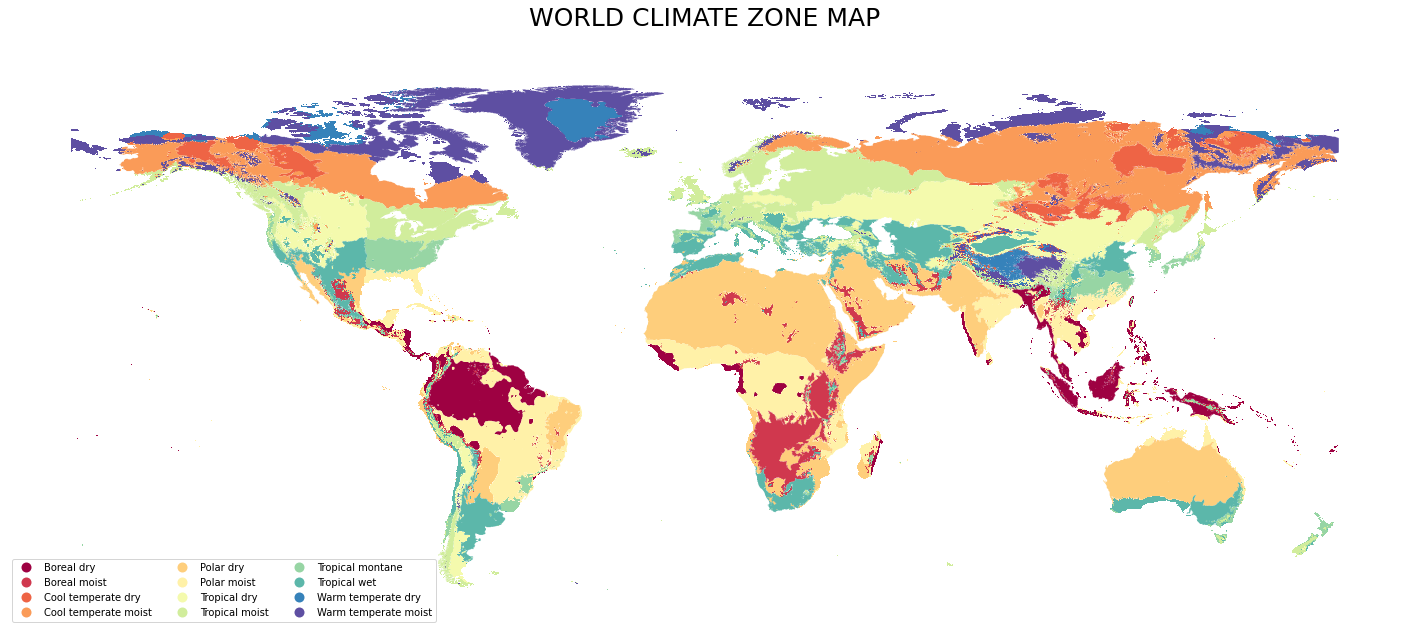

In [62]:
# plotting the map
ax = climate_df.plot(figsize = (25,30), column = 'class_name', legend= True, cmap='Spectral',
                     legend_kwds= {'loc': 'lower left', 'ncol': 3})
ax.set_title('WORLD CLIMATE ZONE MAP\n', fontsize=25)

plt.axis('off')
plt.show()

### Climate Zones of Africa

In [63]:
# creating dataframe
africaClimate_df = climate_df.clip(africa_df)
africaClimate_df = africaClimate_df.reset_index(drop=True)

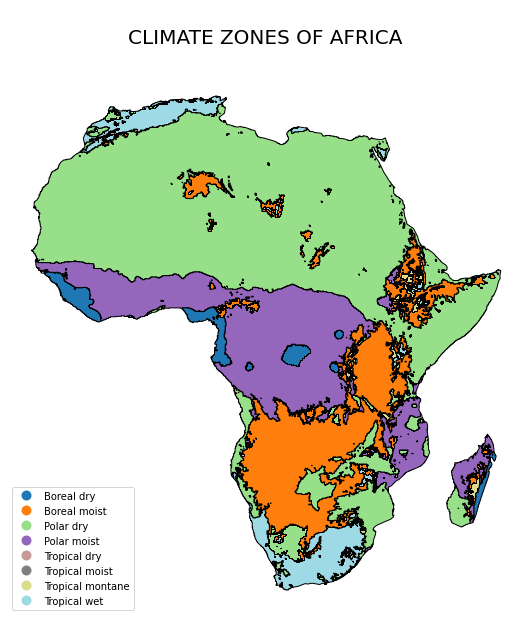

In [64]:
# Plotting in the maps
ax = africaClimate_df.plot(figsize=(10,10), edgecolor='black', column = 'class_name', cmap='tab20',
                                    legend= True, legend_kwds={'loc': 'lower left'})
ax.set_title('\nCLIMATE ZONES OF AFRICA\n', fontsize=20)

plt.axis('off')
plt.show()

### Climate Zones of Nigeria

In [65]:
# creating dataframe
NigeriaClimate_df = climate_df.clip(boundary_df)
NigeriaClimate_df = NigeriaClimate_df.reset_index(drop=True)

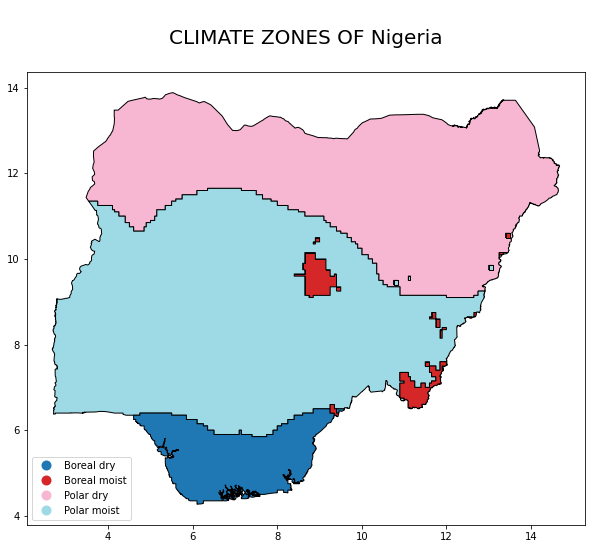

In [66]:
# Plotting in the maps
ax = NigeriaClimate_df.plot(figsize=(10,15), edgecolor='black', column = 'class_name', cmap='tab20',
                                    legend= True, legend_kwds={'loc': 'lower left'})
ax.set_title('\nCLIMATE ZONES OF Nigeria\n', fontsize=20)
plt.show()

### Climate zones of Crossriver and Ogun

In [67]:
# creating dataframe
crossriverClimate_df = climate_df.clip(crossriverboundary_df)
crossriverClimate_df = crossriverClimate_df.reset_index(drop=True)
ogunClimate_df = climate_df.clip(ogunboundary_df)
ogunClimate_df = ogunClimate_df.reset_index(drop=True)

In [68]:
# Using pandas to concatenate the dataframes.
regionsClimate_df = pd.concat([crossriverClimate_df, ogunClimate_df], ignore_index=True)

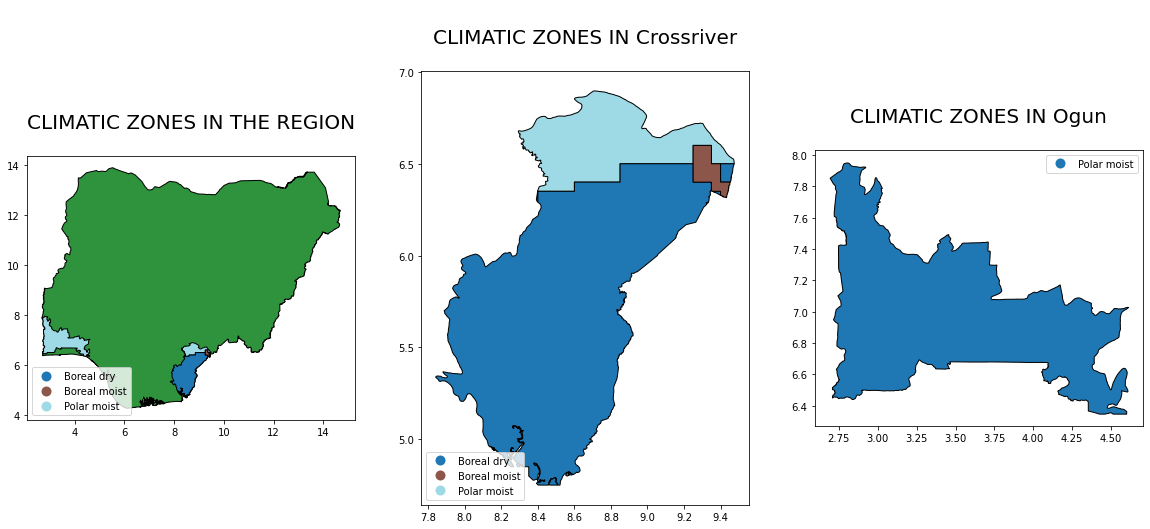

In [69]:
# Plotting in the maps
fig, axes = plt.subplots(1,3, figsize=(20,20))

# first map axes[0]
axes[0].set_title('CLIMATIC ZONES IN THE REGION\n', fontsize=20)
boundary_df.plot(ax=axes[0], color='#2E933C', edgecolor='black')
regionsClimate_df.plot(ax=axes[0], column='class_name', cmap='tab20', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

# second map axes[1]
axes[1].set_title('\nCLIMATIC ZONES IN Crossriver\n', fontsize=20)
crossriverClimate_df.plot(ax=axes[1], column='class_name', cmap='tab20', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'lower left'})

# third map axes[2]
axes[2].set_title('\nCLIMATIC ZONES IN Ogun\n', fontsize=20)
ogunClimate_df.plot(ax=axes[2], column='class_name', cmap='tab20', edgecolor='black',
                  legend=True, legend_kwds={'loc': 'upper right'})
plt.show()

* Climatic zones in Crossriver and Ogun are: Boreal dry, Boreal Moist, Polar Moist with Polar Moist specifically the only dominant climatic zone in Ogun

<a id='Conclusion'></a>
## Conclusion

>* We have more oil Palm & Groundnut predominant in Crossriver, while olive and Rape are predominant in Ogun State
>* Quite interesting to note the vast amount of Maize domination in some certain areas in africa, Egypt inclusive.
>* It is also worthy of nothing that africa is diversed with different agro ecology.
>* Climatic zones in Crossriver and Ogun are: Boreal dry, Boreal Moist, Polar Moist with Polar Moist specifically the only dominant climatic zone in Ogun
>* Some of the most populated coutries are: South Africa, Nigeria, Egypt, Algeria, Ethopia, Sudan, Tanzania, Democratic republic of congo,uganda, kenya. while djibouti one of the least populated